# Categorical Co-occurrences

`catcoocc` is a library for facilitating the analysis of categorical co-occurrence by means of symmetric matrices, asymmetric matrices, and association rules. It is intended for usage on three main types of data: collections of pairwise sequences (both aligned and not), categorical fields in databases, and matrices of presence/absence (such as for investigation of species co-occurrence in biology). More than statistical significance, interested in effect size and strength of association.

For the purposes of the library, the following definitions are used:

- a co-occurrence is an observation of two categorical elements from two different series
- a population is a collection of co-occurrences which can come from the product of elements observed in two sequences (or, if the sequences are aligned, by n-gram windows), by the properties of an individual in a population, or by the product of presences
- a scorer is a collection of association measures between all the possible products of values in alphabet_x and alphabet_y (including those not observed in the data)
- scorers can be computed according to different methods (such as MLE...), either on raw counts of observed data or on smoothed methods; likewise, the output of scorers can be scaled in different ways
- scorers can be symmetric (such as those coming from chi2 methods) or assymetric (such a Theil U), and can be either restricted to positive values or include negative values, and can be bound or not to a range


In [1]:
# This cell contains the system commands for locally installing the package;
# please remember that in most cases, especially in the playground,
# Google CoLab requires the runtime to be restarted (CTRL+M) in order for it
# to pick the new package (thus: run this cell, restart the runtime, and
# run other cells)
!rm -rf catcoocc
!git clone https://github.com/tresoldi/catcoocc.git
!pip3 install --force-reinstall --no-deps -e catcoocc/

Cloning into 'catcoocc'...
remote: Enumerating objects: 121, done.
remote: Counting objects: 100% (121/121), done.
remote: Compressing objects: 100% (87/87), done.
remote: Total 312 (delta 54), reused 92 (delta 33), pack-reused 191
Receiving objects: 100% (312/312), 39.35 MiB | 25.37 MiB/s, done.
Resolving deltas: 100% (140/140), done.
Obtaining file:///content/catcoocc
  Running setup.py develop for catcoocc


In [0]:
from IPython.display import HTML, display

# Import 3rd party libraries
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import tabulate

# Import own libraries
import catcoocc
from catcoocc.scorer import CatScorer

def plot_scorer(scorer, alpha_x, alpha_y, title=None, font_scale=2, figsize=(25, 25), subset=None):
    if not title:
        title = ""

    matrix = pd.DataFrame(scorer, index=alpha_y, columns=alpha_x)

    if subset:
        matrix = matrix.head(subset)
        matrix = matrix.iloc[:,:subset]

    sns.set(font_scale=font_scale)
    plt.figure(figsize=figsize)

    ax = plt.subplot(111)
    sns.heatmap(matrix, annot=True, fmt='.2f', linewidths=.5, center=0, ax=ax).set_title(title, fontsize=font_scale*figsize[0])

Let's start exploring using a subset of the mushroom dataset.

| class     | cap-shape |
|-----------|-----------|
| poisonous | convex    |
| edible    | convex    |
| edible    | bell      |
| poisonous | convex    |
| edible    | convex    |
| edible    | convex    |
| edible    | bell      |
| edible    | bell      |
| poisonous | convex    |
| edible    | bell      |
| edible    | convex    |
| edible    | convex    |
| edible    | bell      |
| poisonous | convex    |
| edible    | convex    |
| edible    | sunken    |
| edible    | flat      |
| poisonous | convex    |
| poisonous | convex    |
| poisonous | convex    |

Mushrooms can be either edible or poisonous, and the cap shapre can be of four types, convex, bell, flat, or sunken. In this subset, flat and sunken are underrepresented, with a single case, both being edibles, but of course it is not safe to eat it?

And now with a sample of CMU


In [7]:
data = catcoocc.read_sequences("catcoocc/resources/cmudict.sample100.tsv")
my_cooccs = catcoocc.collect_cooccs(data)

# README example
my_cooccs = [
             ("A", "c"),
             ("A", "d"),
             ("A", "c"),
             ("B", "g"),
             ("B", "g"),
             ("B", "f"),
]

scorer = catcoocc.scorer.CatScorer(my_cooccs)

mle = scorer.mle()
pmi = scorer.pmi()
npmi = scorer.pmi(True)
chi2 = scorer.chi2()
chi2_ns = scorer.chi2(False)
cramersv = scorer.cramers_v()
cramersv_ns = scorer.cramers_v(False)
fisher = scorer.fisher()
theil_u = scorer.theil_u()
cond_entropy = scorer.cond_entropy()
tresoldi = scorer.tresoldi()

headers = [
    'pair',
    'mle_xy',           'mle_yx', 
    'pmi_xy',           'pmi_yx', 
    'npmi_xy',          'npmi_yx', 
    'chi2_xy',          'chi2_yx', 
    'chi2ns_xy',        'chi2ns_yx', 
    'cremersv_xy',      'cremersv_yx', 
    'cremersvns_xy',    'cremersvns_yx', 
    'fisher_xy',        'fisher_yx', 
    'theilu_xy',        'theilu_yx', 
    'cond_entropy_xy',  'cond_entropy_yx', 
    'tresoldi_xy',      'tresoldi_yx', 
]

table = []
for pair in sorted(scorer.obs):
    buf = [
        pair,
        "%0.4f" % mle[pair][0],           "%0.4f" % mle[pair][1],
        "%0.4f" % pmi[pair][0],           "%0.4f" % pmi[pair][1],
        "%0.4f" % npmi[pair][0],          "%0.4f" % npmi[pair][1],
        "%0.4f" % chi2[pair][0],          "%0.4f" % chi2[pair][1],
        "%0.4f" % chi2_ns[pair][0],       "%0.4f" % chi2_ns[pair][1],
        "%0.4f" % cramersv[pair][0],      "%0.4f" % cramersv[pair][1],
        "%0.4f" % cramersv_ns[pair][0],   "%0.4f" % cramersv_ns[pair][1],
        "%0.4f" % fisher[pair][0],        "%0.4f" % fisher[pair][1],
        "%0.4f" % theil_u[pair][0],       "%0.4f" % theil_u[pair][1],
        "%0.4f" % cond_entropy[pair][0],  "%0.4f" % cond_entropy[pair][1],
        "%0.4f" % tresoldi[pair][0],      "%0.4f" % tresoldi[pair][1],
    ]
    table.append(buf)

    
display(HTML(tabulate.tabulate(table, headers=headers, tablefmt='html')))

pair,mle_xy,mle_yx,pmi_xy,pmi_yx,npmi_xy,npmi_yx,chi2_xy,chi2_yx,chi2ns_xy,chi2ns_yx,cremersv_xy,cremersv_yx,cremersvns_xy,cremersvns_yx,fisher_xy,fisher_yx,theilu_xy,theilu_yx,cond_entropy_xy,cond_entropy_yx,tresoldi_xy,tresoldi_yx
"('A', 'c')",0.6667,1,0.6931,0.6931,0.6309,0.6309,0.75,0.75,3,3,0,0,0.2739,0.2739,inf,inf,0,1,0.6365,0,0.885,1
"('A', 'd')",0.3333,1,0.6931,0.6931,0.3869,0.3869,0,0,1.2,1.2,0,0,0,0,inf,inf,0,1,0.6365,0,0.7832,1
"('A', 'f')",0,0,-1.0986,-1.0986,-0.3066,-0.3066,0,0,1.2,1.2,0,0,0,0,0,0,0.5409,1,0.4774,0,-1.0986,-1.0986
"('A', 'g')",0,0,-1.7918,-1.7918,-0.5,-0.5,0.75,0.75,3,3,0,0,0.2739,0.2739,0,0,0.638,1,0.3819,0,-1.7918,-1.7918
"('B', 'c')",0,0,-1.7918,-1.7918,-0.5,-0.5,0.75,0.75,3,3,0,0,0.2739,0.2739,0,0,0.638,1,0.3819,0,-1.7918,-1.7918
"('B', 'd')",0,0,-1.0986,-1.0986,-0.3066,-0.3066,0,0,1.2,1.2,0,0,0,0,0,0,0.5409,1,0.4774,0,-1.0986,-1.0986
"('B', 'f')",0.3333,1,0.6931,0.6931,0.3869,0.3869,0,0,1.2,1.2,0,0,0,0,inf,inf,0,1,0.6365,0,0.7832,1
"('B', 'g')",0.6667,1,0.6931,0.6931,0.6309,0.6309,0.75,0.75,3,3,0,0,0.2739,0.2739,inf,inf,0,1,0.6365,0,0.885,1


and now more

## With Theil U

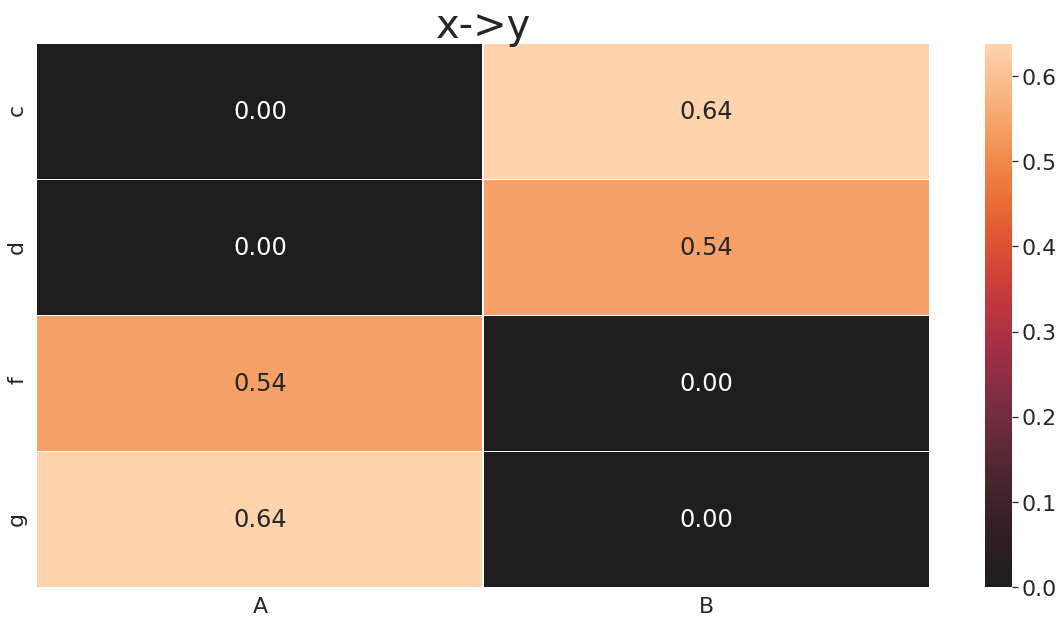

In [8]:
xy, yx, alpha_x, alpha_y = catcoocc.scorer.scorer2matrices(theil_u)

figsize = (20, 10)
subset = 5
plot_scorer(xy, alpha_x, alpha_y, "x->y", 2, figsize, subset=subset)

and even more

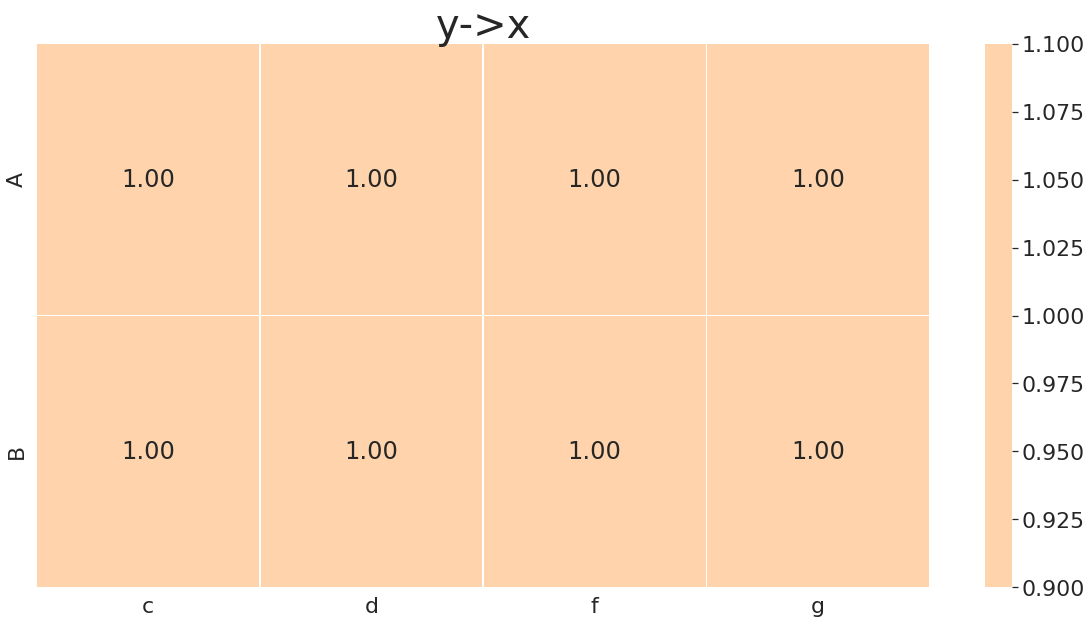

In [9]:
figsize = (20, 10)
subset = 5
plot_scorer(yx, alpha_y, alpha_x, "y->x", 2, figsize, subset=subset)

## With tresoldi

my implementation


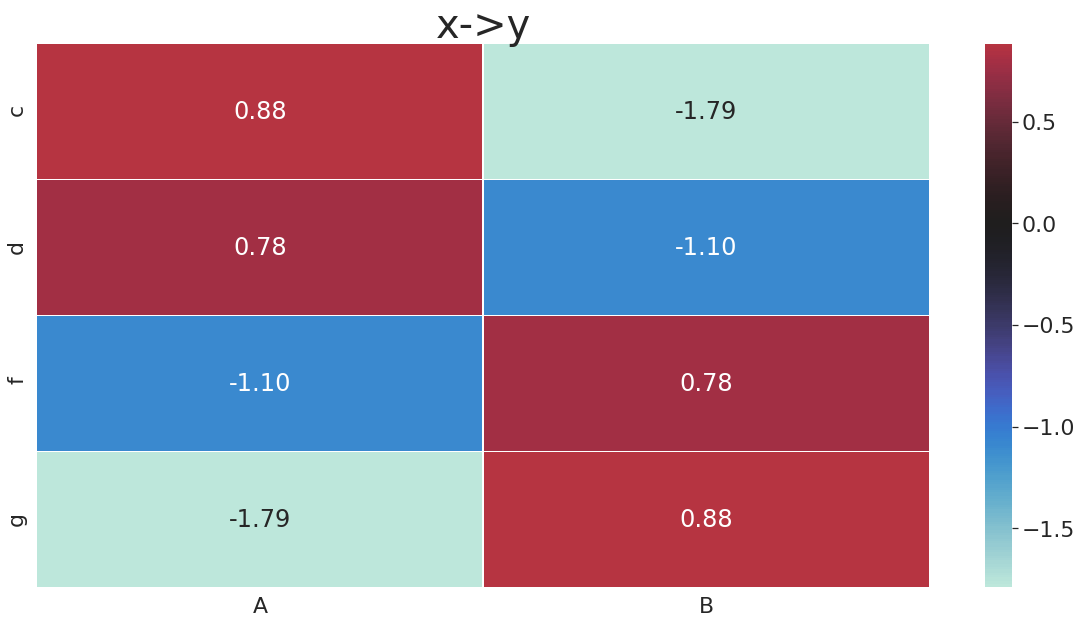

In [10]:
xy, yx, alpha_x, alpha_y = catcoocc.scorer.scorer2matrices(tresoldi)

figsize = (20, 10)
subset = 5
plot_scorer(xy, alpha_x, alpha_y, "x->y", 2, figsize, subset=subset)

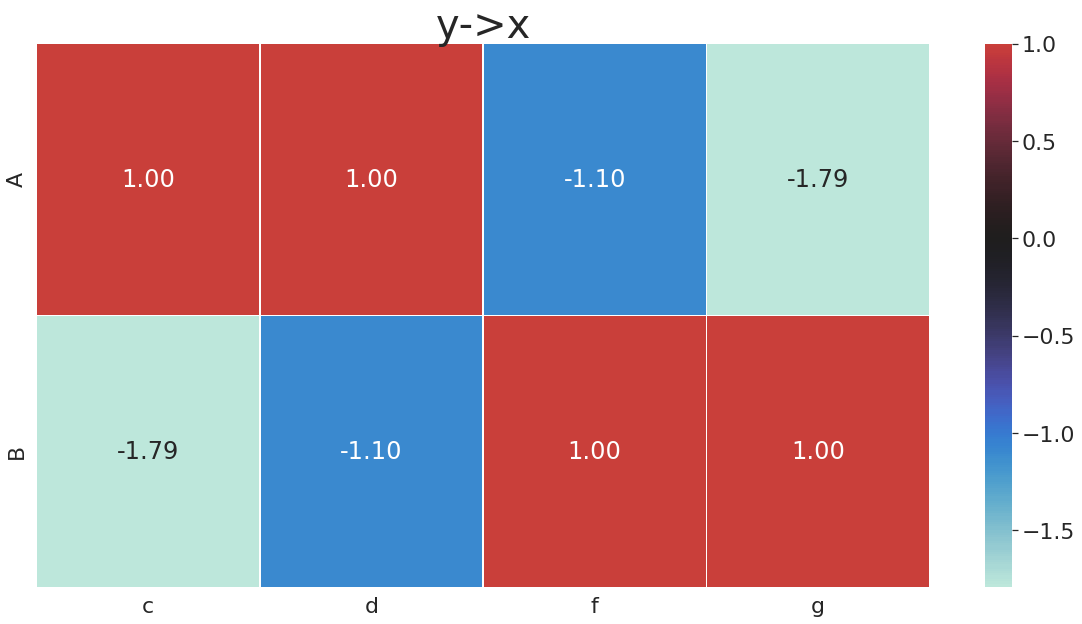

In [11]:
figsize = (20, 10)
subset = 5
plot_scorer(yx, alpha_y, alpha_x, "y->x", 2, figsize, subset=subset)